In [1]:
#Import
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
import re
from nltk.corpus import stopwords
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [2]:
#Read df

TokyoListing = pd.read_csv("Data/TokyoListings.csv")
TokyoReview = pd.read_csv("Data/TokyoReviews.csv")
TokyoCalendar = pd.read_csv("Data/TokyoCalendar.csv")
LondonListing = pd.read_csv("Data/LondonListings.csv")
LondonReview = pd.read_csv("Data/LondonReviews.csv")
LondonCalendar = pd.read_csv("Data/LondonCalendar.csv")

# Let's briefly look at the datasets

In [3]:
#brief overview of the data set
TokyoListing.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20201027041205,2020-10-27,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,...,10.0,9.0,10.0,M130003350,f,1,1,0,0,1.49
1,776070,https://www.airbnb.com/rooms/776070,20201027041205,2020-10-27,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,https://www.airbnb.com/users/show/801494,...,10.0,10.0,10.0,M130000243,t,1,0,1,0,2.37
2,899003,https://www.airbnb.com/rooms/899003,20201027041205,2020-10-27,"Classy room @Shinjuku, Takadanoba",..*+;.*:' Popular room in Airbnb@Tokyo *;+:..*...,NaN,https://a0.muscache.com/pictures/20005274/1df3...,4799233,https://www.airbnb.com/users/show/4799233,...,9.0,9.0,9.0,Other reasons | 【マンスリー契約】最低30泊以上の一時使用賃貸借契約を結びま...,f,2,2,0,0,0.99


In [4]:
LondonListing.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20201106040109,2020-11-07,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039,https://www.airbnb.com/users/show/43039,...,10.0,9.0,9.0,NaN,t,2,2,0,0,1.48
1,13913,https://www.airbnb.com/rooms/13913,20201106040109,2020-11-07,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,10.0,9.0,9.0,NaN,f,2,1,1,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20201106040109,2020-11-07,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,10.0,10.0,9.0,NaN,t,1,1,0,0,0.67


In [5]:
TokyoReview.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,197677,554285,2011-09-21,1002142,Pablo,Couldn’t get any better!\r\n\r\nThe apartment ...
1,197677,627651,2011-10-14,1031940,Ana & Ricardo,The apartment is bigger than it looks in the p...
2,197677,733040,2011-11-21,1097040,Samuel,The appartement is perfect for a couple! It is...


In [6]:
LondonReview.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11551,30672,2010-03-21,93896,Shar-Lyn,"The flat was bright, comfortable and clean and..."
1,11551,32236,2010-03-29,97890,Zane,We stayed with Adriano and Valerio for a week ...
2,11551,41044,2010-05-09,104133,Chase,Adriano was a fantastic host. We felt very at ...


In [7]:
TokyoCalendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,197677,2020-10-27,f,"$11,000.00","$11,000.00",3.0,365.0
1,5128066,2020-10-27,f,"$20,000.00","$20,000.00",1.0,1125.0
2,5128066,2020-10-28,t,"$20,000.00","$20,000.00",1.0,1125.0


In [8]:
LondonCalendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11551,2020-11-07,f,$110.00,$110.00,28.0,1125.0
1,231452,2020-11-07,f,$75.00,$75.00,28.0,13.0
2,231452,2020-11-08,f,$75.00,$75.00,28.0,13.0


# Variables and Data Types
Both Tokyo and London should be structured the same.

In [9]:
TokyoListing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11715 entries, 0 to 11714
Data columns (total 74 columns):
id                                              11715 non-null int64
listing_url                                     11715 non-null object
scrape_id                                       11715 non-null int64
last_scraped                                    11715 non-null object
name                                            11715 non-null object
description                                     11714 non-null object
neighborhood_overview                           9338 non-null object
picture_url                                     11715 non-null object
host_id                                         11715 non-null int64
host_url                                        11715 non-null object
host_name                                       11709 non-null object
host_since                                      11709 non-null object
host_location                                   11709 n

In [10]:
TokyoReview.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301594 entries, 0 to 301593
Data columns (total 6 columns):
listing_id       301594 non-null int64
id               301594 non-null int64
date             301594 non-null object
reviewer_id      301594 non-null int64
reviewer_name    301592 non-null object
comments         301376 non-null object
dtypes: int64(3), object(3)
memory usage: 13.8+ MB


In [11]:
TokyoCalendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4275975 entries, 0 to 4275974
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 228.4+ MB


# Explortory Data Analysis

In [12]:
print('The Tokyo AirBnB data has {} listings, with properties rented out by {} hosts.'.
      format(TokyoListing.shape[0], TokyoListing.host_id.nunique()))
print('The Tokyo AirBnB data has {} reviews, provided from {} to {}.'.
      format(TokyoReview.shape[0], TokyoReview.date.min(), TokyoReview.date.max()))
print('The availability data for Tokyo AirBnBs has been provided from {} to {} on {} homes.'.
      format(TokyoCalendar.date.min(), TokyoCalendar.date.max(), TokyoCalendar.listing_id.nunique()))

The Tokyo AirBnB data has 11715 listings, with properties rented out by 2986 hosts.
The Tokyo AirBnB data has 301594 reviews, provided from 2011-09-21 to 2020-10-27.
The availability data for Tokyo AirBnBs has been provided from 2020-10-27 to 2021-10-26 on 11715 homes.


In [13]:
print('The London AirBnB data has {} listings, with properties rented out by {} hosts.'.
      format(LondonListing.shape[0], LondonListing.host_id.nunique()))
print('The London AirBnB data has {} reviews, provided from {} to {}.'.
      format(LondonReview.shape[0], LondonReview.date.min(), LondonReview.date.max()))
print('The availability data for London AirBnBs has been provided from {} to {} on {} homes.'.
      format(LondonCalendar.date.min(), LondonCalendar.date.max(), LondonCalendar.listing_id.nunique()))

The London AirBnB data has 76984 listings, with properties rented out by 51141 hosts.
The London AirBnB data has 1199654 reviews, provided from 2009-12-21 to 2020-11-07.
The availability data for London AirBnBs has been provided from 2020-11-06 to 2021-11-06 on 76984 homes.


# Data Preparation

In [14]:
# creating copies of the original dataframes
listings_tokyo_orig = TokyoListing.copy()
reviews_tokyo_orig = TokyoReview.copy()
calendar_tokyo_orig = TokyoCalendar.copy()

listings_london_orig = LondonListing.copy()
reviews_london_orig = LondonReview.copy()
calendar_london_orig = LondonCalendar.copy()

For airbnb listing availabilities, the values are booleans, we can transcode it to 0 and 1s since they are binary for easy calculations.

In [15]:
#. True (Available) = 0 
# False(Unavailable) = 1
TokyoCalendar['booked'] = TokyoCalendar.available.map( lambda x: 0 if x == 't' else 1)
LondonCalendar['booked'] = LondonCalendar.available.map( lambda x: 0 if x == 't' else 1)

# Test
display(TokyoCalendar.head(2))
display(LondonCalendar.head(2))

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,booked
0,197677,2020-10-27,f,"$11,000.00","$11,000.00",3.0,365.0,1
1,5128066,2020-10-27,f,"$20,000.00","$20,000.00",1.0,1125.0,1


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,booked
0,11551,2020-11-07,f,$110.00,$110.00,28.0,1125.0,1
1,231452,2020-11-07,f,$75.00,$75.00,28.0,13.0,1


In [16]:
#Convert Tokyo Price to float

TokyoCalendar.price = (TokyoCalendar['price'].replace( '[\$,)]','', regex=True ).astype(float))

In [17]:
#Convert London Price to float

LondonCalendar.price = (LondonCalendar['price'].replace( '[\$,)]','', regex=True ).astype(float))

In [18]:
TokyoCalendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4275975 entries, 0 to 4275974
Data columns (total 8 columns):
listing_id        int64
date              object
available         object
price             float64
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
booked            int64
dtypes: float64(3), int64(2), object(3)
memory usage: 261.0+ MB


In [19]:
TokyoCalendar.describe()

,listing_id,price,minimum_nights,maximum_nights,booked
count,4.275975e+06,4.275975e+06,4.275641e+06,4.275641e+06,4.275975e+06
mean,3.320544e+07,2.636742e+04,4.036237e+00,1.753650e+06,5.304519e-01
std,9.844598e+06,7.905316e+04,1.749045e+01,6.132881e+07,4.990719e-01
min,1.976770e+05,1.500000e+02,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.783739e+07,6.000000e+03,1.000000e+00,3.650000e+02,0.000000e+00
50%,3.507147e+07,1.098000e+04,1.000000e+00,1.125000e+03,1.000000e+00
75%,4.129615e+07,2.000000e+04,2.000000e+00,1.125000e+03,1.000000e+00
max,4.604165e+07,9.428215e+06,3.000000e+02,2.147484e+09,1.000000e+00


In [20]:
LondonCalendar.describe()

,listing_id,price,minimum_nights,maximum_nights,booked
count,2.809908e+07,2.809908e+07,2.809884e+07,2.809884e+07,2.809908e+07
mean,2.562495e+07,1.240100e+02,7.358436e+00,6.618208e+05,6.675177e-01
std,1.319050e+07,3.598741e+02,2.554383e+01,3.731807e+07,4.711028e-01
min,1.155100e+04,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.509083e+07,4.500000e+01,1.000000e+00,9.000000e+01,0.000000e+00
50%,2.585003e+07,8.000000e+01,2.000000e+00,1.125000e+03,1.000000e+00
75%,3.760852e+07,1.350000e+02,5.000000e+00,1.125000e+03,1.000000e+00
max,4.626152e+07,1.867300e+04,1.125000e+03,2.147484e+09,1.000000e+00


In [21]:
np.sum(TokyoCalendar.booked/TokyoCalendar.shape[0])

0.530451885242547

In [22]:
np.sum(LondonCalendar.booked/LondonCalendar.shape[0])

0.6675177146356606

# 1. When would be the perfect time to book airbnb?

In [23]:
# creating copies of the calendars
availability_Tokyo = TokyoCalendar.copy()
availability_London  = LondonCalendar.copy()

# calculating mean listing availability grouped by date
availability_Tokyo = availability_Tokyo.groupby('date')['booked'].mean().reset_index()
availability_Tokyo['date'] = pd.to_datetime(availability_Tokyo['date'])

availability_London = availability_London.groupby('date')['booked'].mean().reset_index()
availability_London['date'] = pd.to_datetime(availability_London['date'])

/Users/yourmaster/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


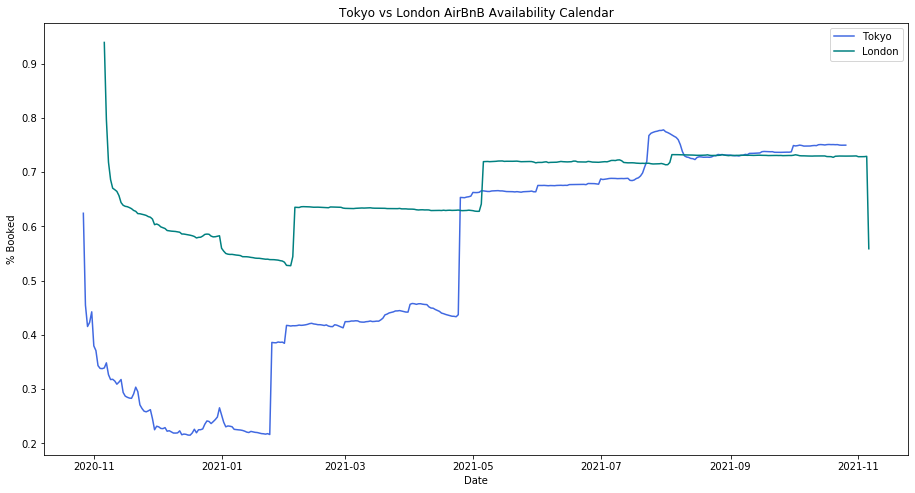

In [24]:
# plotting 
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.plot(availability_Tokyo['date'], availability_Tokyo['booked'], 'royalblue', label='Tokyo')
ax.plot(availability_London['date'], availability_London['booked'], 'teal', label='London')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('% Booked')
plt.title('Tokyo vs London AirBnB Availability Calendar')
plt.show();

From the above chart, we see that London Airbnb listing is highly popular throughout the year. Tokyo however is heavily declined from Oct 2020 to early 2021, but it is greatly increasing in 2021 probably due to the Pfizer and Moderna vaccines being announced. Also because the Tokyo Olympics is delayed until 2021 July, this is probably why it surpassed the London airbnb listing booking.

# 2. Which Part of the City would be the cheaper option for travel in general?

In [25]:
print('The mean AirBnB price in Tokyo is ${}.'.
      format(int(TokyoCalendar['price'].mean())))
print('The mean AirBnB price in London is ${}.'.
      format(int(LondonCalendar['price'].mean())))

Out of the available listings, the mean AirBnB price in Tokyo is $26367.
Out of the available listings, the mean AirBnB price in London is $124.


In [26]:
#Check the tokyo dataframe to see if the currency is different
TokyoCalendar.price

0          11000.0
1          20000.0
2          20000.0
3          20000.0
4          20000.0
            ...   
4275970    13800.0
4275971    13800.0
4275972     4878.0
4275973     4878.0
4275974     4878.0
Name: price, Length: 4275975, dtype: float64

In [27]:
# At this date, the foreign exchange from yen to GBP is 138.69. I assume the London data set is in GBP, then let's level set  both currencies to do the comparison

gbp = 138.69
TokyoCalendar['GBPPrice'] = TokyoCalendar.price/gbp
TokyoCalendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,booked,GBPPrice
0,197677,2020-10-27,f,11000.0,"$11,000.00",3.0,365.0,1,79.313577
1,5128066,2020-10-27,f,20000.0,"$20,000.00",1.0,1125.0,1,144.206504
2,5128066,2020-10-28,t,20000.0,"$20,000.00",1.0,1125.0,0,144.206504
3,5128066,2020-10-29,t,20000.0,"$20,000.00",1.0,1125.0,0,144.206504
4,5128066,2020-10-30,t,20000.0,"$20,000.00",1.0,1125.0,0,144.206504
...,...,...,...,...,...,...,...,...,...
4275970,16897387,2021-10-22,f,13800.0,"$13,524.00",1.0,1125.0,1,99.502488
4275971,16897387,2021-10-23,f,13800.0,"$13,524.00",1.0,1125.0,1,99.502488
4275972,16897387,2021-10-24,f,4878.0,"$4,780.00",1.0,1125.0,1,35.171966
4275973,16897387,2021-10-25,f,4878.0,"$4,780.00",1.0,1125.0,1,35.171966


In [28]:
print('The mean AirBnB price in Tokyo is ${}.'.
      format(int(TokyoCalendar['GBPPrice'].mean())))
print('The mean AirBnB price in London is ${}.'.
      format(int(LondonCalendar['price'].mean())))

Out of the available listings, the mean AirBnB price in Tokyo is $190.
Out of the available listings, the mean AirBnB price in London is $124.


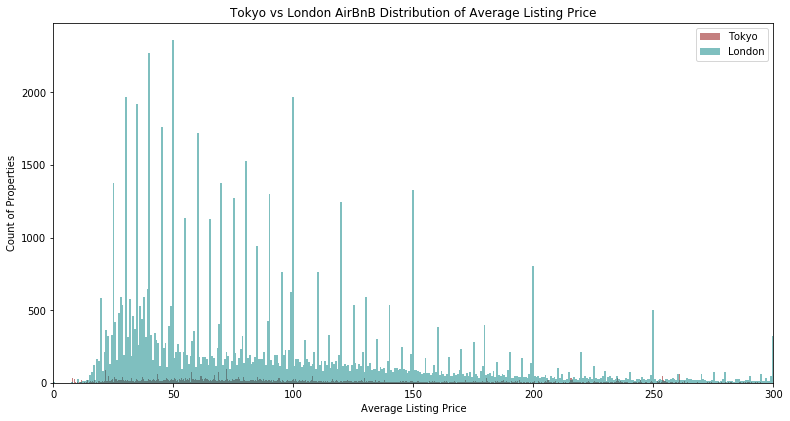

In [29]:
# plotting the same distribution including x-axis limits
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
#bin_edges = np.arange(0, TokyoCalendar['GBPPrice'].max(), 1)
ax.hist(TokyoCalendar.groupby('listing_id').mean()['GBPPrice'],alpha=0.5, label='Tokyo', bins=25000, color='darkred')
ax.hist(LondonCalendar.groupby('listing_id').mean()['price'],alpha=0.5, label='London', bins=25000, color='teal')
ax.legend()
ax.set_xlabel('Average Listing Price')
ax.set_ylabel('Count of Properties')
plt.title('Tokyo vs London AirBnB Distribution of Average Listing Price')
plt.xlim(0,300);

Looking at the chart above, the reason why London seems to be way above of Tokyo is because they have much more listings than Tokyo. But from the average listing price, we can see that Tokyo is at 190 GBP and London is only at 124 GBP. Technically Tokyo is more expensive than London in general. The amount of listings in below 100 GBP is much more  frequent in London where Tokyo is much more distributed.

# Which neighbourhood would be the best?

There are a number of criteria that are used to determine which area is the best to stay

1. Availability
2. Review Rating
3. Features


# Tokyo

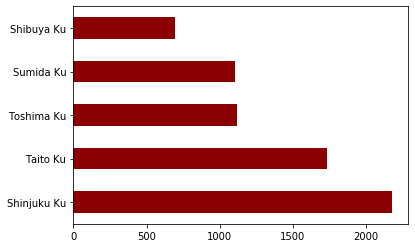

In [30]:
#Check whats the top 5 neighbourhoods
TokyoListing['neighbourhood_cleansed'].value_counts()[:5].plot(kind='barh', color = 'darkred')

In [31]:
#Filter for the top 5 above
Top5TokyoNeighbourhood = TokyoListing.query('neighbourhood_cleansed == "Shinjuku Ku" | neighbourhood_cleansed == "Taito Ku" | neighbourhood_cleansed == "Toshima Ku" | neighbourhood_cleansed == "Sumida Ku" | neighbourhood_cleansed == "Shibuya Ku"')
# Check if its the "entire dataframe but only queried for the top 5"
Top5TokyoNeighbourhood.neighbourhood_cleansed.value_counts()

Shinjuku Ku    2179
Taito Ku       1733
Toshima Ku     1118
Sumida Ku      1106
Shibuya Ku      696
Name: neighbourhood_cleansed, dtype: int64

In [32]:
#Merge with calendar to see which one is actually the most available?
Top5MergedDF = pd.merge(left=Top5TokyoNeighbourhood, right=TokyoCalendar, left_on='id', right_on='listing_id')

In [33]:
Top5MergedDF.id.value_counts().describe()

count    6832.0
mean      365.0
std         0.0
min       365.0
25%       365.0
50%       365.0
75%       365.0
max       365.0
Name: id, dtype: float64

Note: 6832 Listings in these 5 neighbourhoods, each of them have avaialbility for all 365 days.

In [34]:
#Average cost in the 5 regions

Avg5NeighbourhoodPrice = Top5MergedDF.price_y.mean()
print ('The average cost in the 5 most popular neighbourhood in Tokyo is ${}'.
      format(int(Avg5NeighbourhoodPrice)))

The average cost in the 5 most popular neighbourhood in Tokyo is $26518


In [35]:
# The average for the ones that are available are...
PriceAvailableListingsinTop5 = Top5MergedDF.query ('booked == 0')
PriceAvailableListingsinTop5 = PriceAvailableListingsinTop5.price_y.mean()
print ('The average cost in the 5 most popular neighbourhood in Tokyo is ${}'.
      format(int(PriceAvailableListingsinTop5)))

The average cost in the 5 most popular neighbourhood in Tokyo is $23874


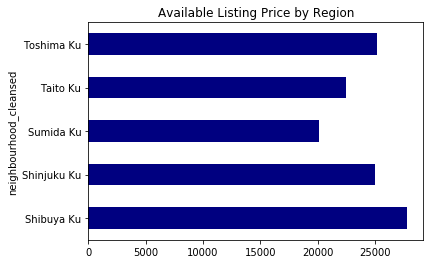

In [36]:
# Out of the available listings in the top 5 region, which region would be the cheapest?
CheapestTokyoTop5Available = Top5MergedDF.query ('booked == 0')
CheapestTokyoTop5Available=CheapestTokyoTop5Available.groupby('neighbourhood_cleansed').mean()['price_y']
CheapestTokyoTop5Available.plot(kind='barh', color = 'navy', title='Available Listing Price by Region', label='Price')

Above is in Yen, you may convert it back to GBP by dividing by 138.69

# London

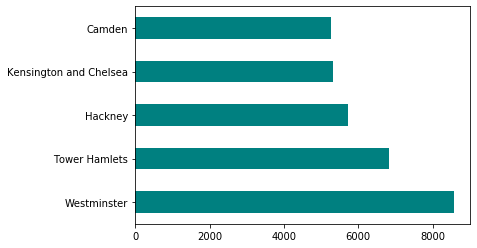

In [37]:

LondonListing['neighbourhood_cleansed'].value_counts()[:5].plot(kind='barh', color = 'teal')

In [38]:
#Filter for the top 5 above
Top5LondonNeighbourhood = LondonListing.query('neighbourhood_cleansed == "Camden" | neighbourhood_cleansed == "Kensington and Chelsea" | neighbourhood_cleansed == "Hackney" | neighbourhood_cleansed == "Tower Hamlets" | neighbourhood_cleansed == "Westminster"')

#Merge with calendar to see which one is actually the most available?
Top5LondonMergedDF = pd.merge(left=Top5LondonNeighbourhood, right=LondonCalendar, left_on='id', right_on='listing_id')
Top5LondonMergedDF.neighbourhood_cleansed.value_counts()

Westminster               3130276
Tower Hamlets             2494082
Hackney                   2088190
Kensington and Chelsea    1945104
Camden                    1919182
Name: neighbourhood_cleansed, dtype: int64

In [39]:
Top5LondonMergedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11576834 entries, 0 to 11576833
Data columns (total 82 columns):
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
description                                     object
neighborhood_overview                           object
picture_url                                     object
host_id                                         int64
host_url                                        object
host_name                                       object
host_since                                      object
host_location                                   object
host_about                                      object
host_response_time                              object
host_response_rate                              object
host_acc

In [40]:
Top5LondonMergedDF.price_y.mean()

154.83886155748627

As we can tell, the average cost for these regions are significantly higher at 154.83 than the average cost of London overall at 124. The cheaper airbnbs are further away or in less popular areas of London, maybe the transit is not as convenient or there must be some sort of trade offs.

In [41]:
# The average for the ones that are available are...
PriceLondonAvailable = Top5LondonMergedDF.query ('booked == 0')
PriceLondonAvailable = PriceLondonAvailable.price_y.mean()
print ('The average cost in the 5 most popular neighbourhood in London is ${}'.
      format(int(PriceLondonAvailable)))

The average cost in the 5 most popular neighbourhood in London is $194


This is even more apparent, the remaining 5 regions on average is already higher at $124, but the available listings are even MORE expensive at $194 on average. That is even higher than the Tokyo airbnbs at $172


It would seem like London has more airbnb listings available and we have the option to choose the cheaper ones compared to Tokyo.

However, after mining some data within both data sets, we find that Tokyo has a lot more listings remaining as of the date this dataset is created where London is already fully booked except for the expensive listings.

If I am a traveller, I think I would be better off going to Tokyo for cheaper accomodations.

# What about customer satisfaction?

## Couple criteria we could look at is review scores.

In [42]:
TokyoListingReview = TokyoListing[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
             'review_scores_communication', 'review_scores_location','review_scores_value']]

In [43]:
TokyoListingReview.describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000
mean,93.276751,9.575634,9.393103,9.693275,9.703051,9.467125,9.303932
std,7.802143,0.775675,0.911858,0.698223,0.723312,0.755691,0.808463
min,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Here are couple take aways from this data.

- review_scores_rating has a maximum of 100, and the rest are out of 10.
- The minimum was 20 but the mean was 93.27 which is surprisingly high.
- The lowest mean, which was 9.3/10 was the "value" of the property. Could it mean that the price is too high comparing to the features it offer? Maybe its size? OR the number of beds/people it accomodates?

In [44]:
LondonListingReview = LondonListing[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
             'review_scores_communication', 'review_scores_location','review_scores_value']]

LondonListingReview.describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,53494.000000,53429.000000,53439.000000,53381.000000,53432.000000,53383.000000,53382.000000
mean,93.104647,9.533287,9.292053,9.653809,9.677272,9.559785,9.305253
std,10.369240,1.020381,1.174626,0.919405,0.910233,0.861432,1.066519
min,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Here are coouple take aways from this data for London Listings

- cleanliness tends to have the least score, could it be tied to how many people the listing can accomodate? The more people, the less clean it is?
- minimum is also 20 for London, maybe this is insignificant

## In order to understand these, we need to find the coefficient of these variables to understand their relationships

In [45]:
#Verifying London DF, it should have only the listings from the 5 regions and also 365 days of data ready.
Top5LondonMergedDF

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y,booked
0,15400,https://www.airbnb.com/rooms/15400,20201106040109,2020-11-07,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,0,0.67,15400,2020-11-07,f,75.0,$75.00,28.0,50.0,1
1,15400,https://www.airbnb.com/rooms/15400,20201106040109,2020-11-07,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,0,0.67,15400,2020-11-08,f,75.0,$75.00,28.0,50.0,1
2,15400,https://www.airbnb.com/rooms/15400,20201106040109,2020-11-07,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,0,0.67,15400,2020-11-09,f,75.0,$75.00,28.0,50.0,1
3,15400,https://www.airbnb.com/rooms/15400,20201106040109,2020-11-07,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,0,0.67,15400,2020-11-10,f,75.0,$75.00,28.0,50.0,1
4,15400,https://www.airbnb.com/rooms/15400,20201106040109,2020-11-07,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,0,0.67,15400,2020-11-11,f,75.0,$75.00,28.0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11576829,46259459,https://www.airbnb.com/rooms/46259459,20201106040109,2020-11-06,✨Double bedroom in Mayfair🌟,NaN,NaN,https://a0.muscache.com/pictures/80050ec9-b4ea...,320950254,https://www.airbnb.com/users/show/320950254,...,0,NaN,46259459,2021-11-01,f,100.0,$100.00,1.0,365.0,1
11576830,46259459,https://www.airbnb.com/rooms/46259459,20201106040109,2020-11-06,✨Double bedroom in Mayfair🌟,NaN,NaN,https://a0.muscache.com/pictures/80050ec9-b4ea...,320950254,https://www.airbnb.com/users/show/320950254,...,0,NaN,46259459,2021-11-02,f,100.0,$100.00,1.0,365.0,1
11576831,46259459,https://www.airbnb.com/rooms/46259459,20201106040109,2020-11-06,✨Double bedroom in Mayfair🌟,NaN,NaN,https://a0.muscache.com/pictures/80050ec9-b4ea...,320950254,https://www.airbnb.com/users/show/320950254,...,0,NaN,46259459,2021-11-03,f,100.0,$100.00,1.0,365.0,1
11576832,46259459,https://www.airbnb.com/rooms/46259459,20201106040109,2020-11-06,✨Double bedroom in Mayfair🌟,NaN,NaN,https://a0.muscache.com/pictures/80050ec9-b4ea...,320950254,https://www.airbnb.com/users/show/320950254,...,0,NaN,46259459,2021-11-04,f,100.0,$100.00,1.0,365.0,1


In [46]:
#Verifying Tokyo DF, it should have only the listings from the 5 regions and also 365 days of data ready.
Top5MergedDF

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,reviews_per_month,listing_id,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y,booked,GBPPrice
0,197677,https://www.airbnb.com/rooms/197677,20201027041205,2020-10-27,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,...,1.49,197677,2020-10-27,f,11000.0,"$11,000.00",3.0,365.0,1,79.313577
1,197677,https://www.airbnb.com/rooms/197677,20201027041205,2020-10-27,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,...,1.49,197677,2020-10-28,f,11000.0,"$11,000.00",3.0,365.0,1,79.313577
2,197677,https://www.airbnb.com/rooms/197677,20201027041205,2020-10-27,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,...,1.49,197677,2020-10-29,t,11000.0,"$11,000.00",3.0,365.0,0,79.313577
3,197677,https://www.airbnb.com/rooms/197677,20201027041205,2020-10-27,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,...,1.49,197677,2020-10-30,t,11000.0,"$11,000.00",3.0,365.0,0,79.313577
4,197677,https://www.airbnb.com/rooms/197677,20201027041205,2020-10-27,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,...,1.49,197677,2020-10-31,t,11000.0,"$11,000.00",3.0,365.0,0,79.313577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493675,46015178,https://www.airbnb.com/rooms/46015178,20201027041205,2020-10-27,15mins to Shinjuku/Ikebukuro/Ginza/Tokyo! 2ppl,Hello，welcome to my house~~my apartment is loc...,"It is in a quiet residential area, and there a...",https://a0.muscache.com/pictures/0680c42d-e2d1...,29966538,https://www.airbnb.com/users/show/29966538,...,NaN,46015178,2021-10-22,f,50000.0,"$50,000.00",1.0,1125.0,1,360.516259
2493676,46015178,https://www.airbnb.com/rooms/46015178,20201027041205,2020-10-27,15mins to Shinjuku/Ikebukuro/Ginza/Tokyo! 2ppl,Hello，welcome to my house~~my apartment is loc...,"It is in a quiet residential area, and there a...",https://a0.muscache.com/pictures/0680c42d-e2d1...,29966538,https://www.airbnb.com/users/show/29966538,...,NaN,46015178,2021-10-23,f,50000.0,"$50,000.00",1.0,1125.0,1,360.516259
2493677,46015178,https://www.airbnb.com/rooms/46015178,20201027041205,2020-10-27,15mins to Shinjuku/Ikebukuro/Ginza/Tokyo! 2ppl,Hello，welcome to my house~~my apartment is loc...,"It is in a quiet residential area, and there a...",https://a0.muscache.com/pictures/0680c42d-e2d1...,29966538,https://www.airbnb.com/users/show/29966538,...,NaN,46015178,2021-10-24,f,50000.0,"$50,000.00",1.0,1125.0,1,360.516259
2493678,46015178,https://www.airbnb.com/rooms/46015178,20201027041205,2020-10-27,15mins to Shinjuku/Ikebukuro/Ginza/Tokyo! 2ppl,Hello，welcome to my house~~my apartment is loc...,"It is in a quiet residential area, and there a...",https://a0.muscache.com/pictures/0680c42d-e2d1...,29966538,https://www.airbnb.com/users/show/29966538,...,NaN,46015178,2021-10-25,f,50000.0,"$50,000.00",1.0,1125.0,1,360.516259


In [47]:
#Again, Only Query out the available ones.

TokyoAvailable = Top5MergedDF.query ('booked==0')
LondonAvailable = Top5LondonMergedDF.query('booked==0')

In [48]:
TokyoAvailable.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,reviews_per_month,listing_id,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y,booked,GBPPrice
2,197677,https://www.airbnb.com/rooms/197677,20201027041205,2020-10-27,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,...,1.49,197677,2020-10-29,t,11000.0,"$11,000.00",3.0,365.0,0,79.313577
3,197677,https://www.airbnb.com/rooms/197677,20201027041205,2020-10-27,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,...,1.49,197677,2020-10-30,t,11000.0,"$11,000.00",3.0,365.0,0,79.313577
4,197677,https://www.airbnb.com/rooms/197677,20201027041205,2020-10-27,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,...,1.49,197677,2020-10-31,t,11000.0,"$11,000.00",3.0,365.0,0,79.313577
5,197677,https://www.airbnb.com/rooms/197677,20201027041205,2020-10-27,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,...,1.49,197677,2020-11-01,t,11000.0,"$11,000.00",3.0,365.0,0,79.313577
6,197677,https://www.airbnb.com/rooms/197677,20201027041205,2020-10-27,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,...,1.49,197677,2020-11-02,t,11000.0,"$11,000.00",3.0,365.0,0,79.313577


In [50]:
LondonAvailable.head(5)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y,booked
40,15400,https://www.airbnb.com/rooms/15400,20201106040109,2020-11-07,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,0,0.67,15400,2020-12-17,t,75.0,$75.00,10.0,50.0,0
41,15400,https://www.airbnb.com/rooms/15400,20201106040109,2020-11-07,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,0,0.67,15400,2020-12-18,t,75.0,$75.00,10.0,50.0,0
42,15400,https://www.airbnb.com/rooms/15400,20201106040109,2020-11-07,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,0,0.67,15400,2020-12-19,t,75.0,$75.00,10.0,50.0,0
43,15400,https://www.airbnb.com/rooms/15400,20201106040109,2020-11-07,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,0,0.67,15400,2020-12-20,t,75.0,$75.00,10.0,50.0,0
44,15400,https://www.airbnb.com/rooms/15400,20201106040109,2020-11-07,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,0,0.67,15400,2020-12-21,t,75.0,$75.00,10.0,50.0,0


In [52]:
TokyoAvailable.room_type

2          Entire home/apt
3          Entire home/apt
4          Entire home/apt
5          Entire home/apt
6          Entire home/apt
                ...       
2493400    Entire home/apt
2493401    Entire home/apt
2493402    Entire home/apt
2493403    Entire home/apt
2493404    Entire home/apt
Name: room_type, Length: 1151752, dtype: object

In [53]:
df1=pd.get_dummies(TokyoAvailable['room_type'], drop_first=True)

In [60]:
df2 = pd.concat([TokyoAvailable.price_y,df1],axis=1)

In [62]:
df2

,price_y,Hotel room,Private room,Shared room
2,11000.0,0,0,0
3,11000.0,0,0,0
4,11000.0,0,0,0
5,11000.0,0,0,0
6,11000.0,0,0,0
...,...,...,...,...
2493400,50000.0,0,0,0
2493401,50000.0,0,0,0
2493402,50000.0,0,0,0
2493403,50000.0,0,0,0


In [77]:
X=df2.drop('price_y', axis=1)
y= df2['price_y']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [81]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
y_pred=regression.predict(X_test)

In [83]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [84]:
score

0.01973858059435707

The score is very low, this means that the room type has almost no correlation to how much it will cost as we are unable to predict its values based on what they are. There must be other factors that go into how much things costs.

We can also look at review scores, which of the 5 locations have the highest review scores and have hte best values?

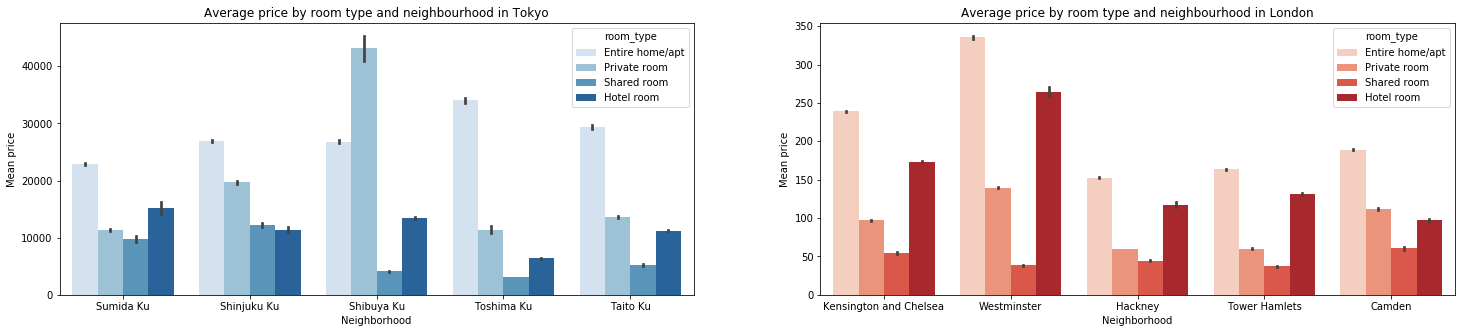

In [86]:
# plotting average price by neighbourhood and room type
plt.figure(figsize = [25, 5])
# New York
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# create the plot
sns.barplot(data = TokyoAvailable, x = 'neighbourhood_cleansed', y = 'price_y', hue='room_type', palette='Blues')
plt.ylabel('Mean price')
plt.xlabel('Neighborhood')
plt.title('Average price by room type and neighbourhood in Tokyo')

# Toronto
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# create the plot
sns.barplot(data = LondonAvailable, x = 'neighbourhood_cleansed', y = 'price_y', hue='room_type', palette='Reds')
plt.ylabel('Mean price')
plt.xlabel('Neighborhood')
plt.title('Average price by room type and neighbourhood in London');

Okay great, this is what I was looking for. I would most likely look for a entire apartment for rental so by looking at the charts, seems like Toshima Ku and Taito Ku have the most availability, but the price is rather high(top 2) Since the currency is in Yen, I cant

### Conclusion

#### When is a good time to travel to both of these cities in 2021?
For Tokyo, it seems like 2021 March to May quite a lot of availability, and London is booked throughout the year. This means the more available the airbnbs are, the more choices I have to match the budget I have for this trip and the features I want in the airbnb.

#### Price range for both locations?
Out of ALL the listings, the mean AirBnB price in Tokyo is $190 and London is $124.
However, after filtering out the listings that are unavailable at this moment, we are left with finaly numbers of $172 average for Tokyo and $192 for London. This means the cheapest London Airbnbs are already reserved, they are no longer unavailable, whats available for me is the expensive listings which I cannot afford.

#### What regions are the most popular to reside in?
#### Tokyo
Shinjuku Ku    2179
Taito Ku       1733
Toshima Ku     1118
Sumida Ku      1106
Shibuya Ku      696

#### London 
Westminster          
Tower Hamlets            
Hackney                  
Kensington and Chelsea   
Camden  

#### Which of the top regions will have the lowest cost and what kind of airbnb are they?
In terms of availability for lowest cost, I think Hotel rooms actually cost lower than the entire home/apartment, I will not want a shared room. So Hotel room would be the go to choice for me and so far, Toshima Ku has the lowest cost out of all. In terms of London, All of them seem really expensive, but if I were to choose, I would stay at Camden.

#### Out of the reviews, which are criteria are the worst?
Tokyo seems to be the value and London is the cleanliness.

#### Which is my final choice?
Toshima Ku is my go-to choice for this trip due to budget concerns and overall airbnb reviews and availability which seems to be a concern in the UK.